In [ ]:
%%HTML

<link rel="stylesheet" href="../custom.css"/> 

# DC Interpretation

Today's Goals:
* Recap
* Inversion
* Sensitivity
* Planning for tomorrow

## Recap:

## Soundings and Profiling:
<div class="row">
<div class="column">
    
**Sounding**
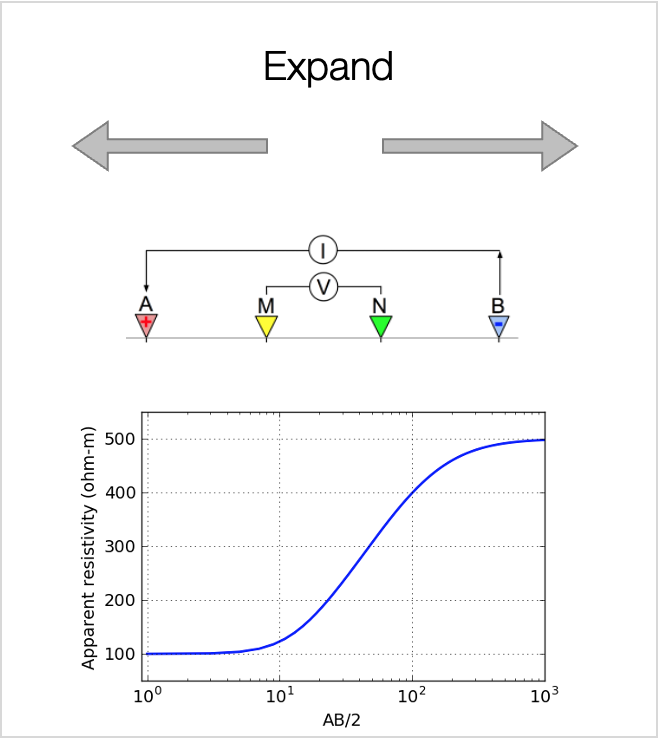
</div>
<div class="column">

**Profiling**
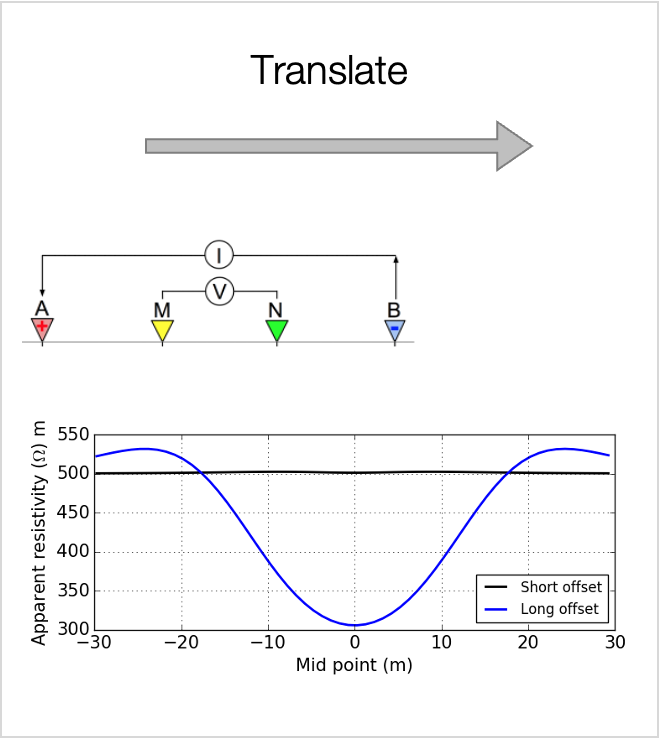
</div>
</div>

## Resistivity arrays
These are the most common array types used in resistivity surveying

![surveys](https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20201216112229377-0786:9781108685955:49274fig4_3.png?pub-status=live)


### Psuedosections
* Horizontal location as the midpoint of the ABMN array (logical)
* Depth:
  * Larger electrode spacing ~ sensitive to deeper structures.
  * Depth axis usually a Array length / 2, but it's just a psuedo-depth and doesn't
    mean anything, it's just a way of organizing the data in a plot.

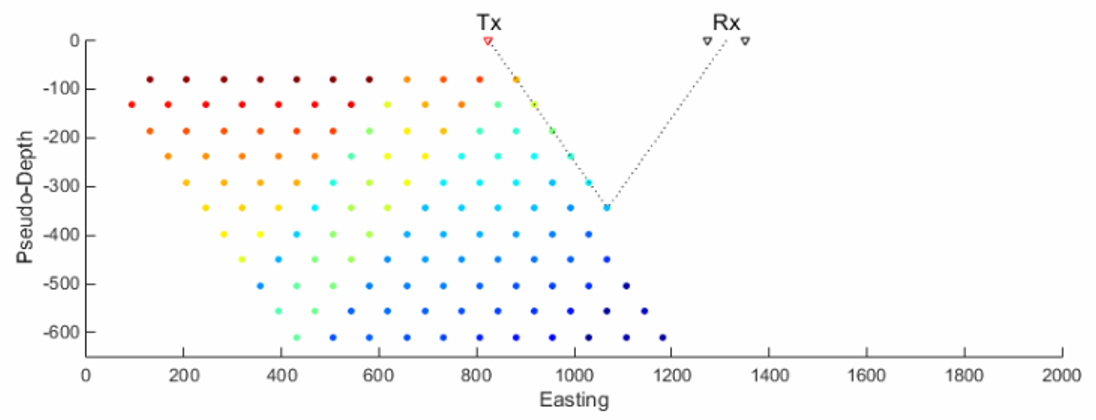

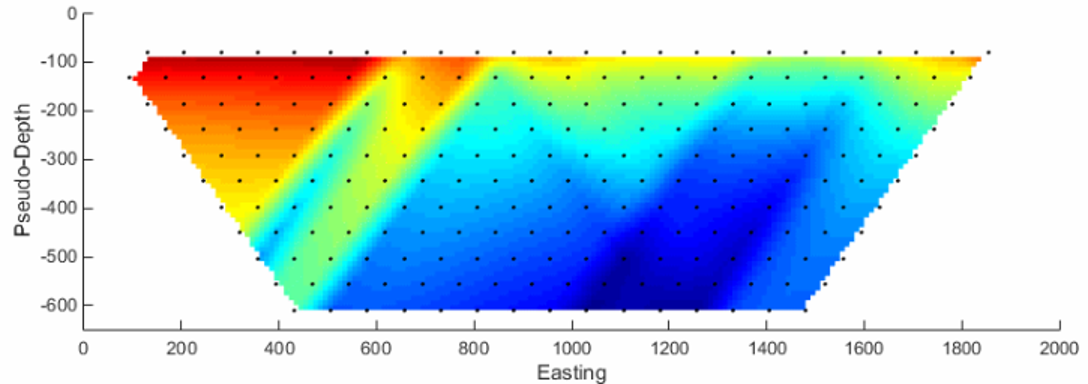

* Quickly complicated by different geological structures and array configurations

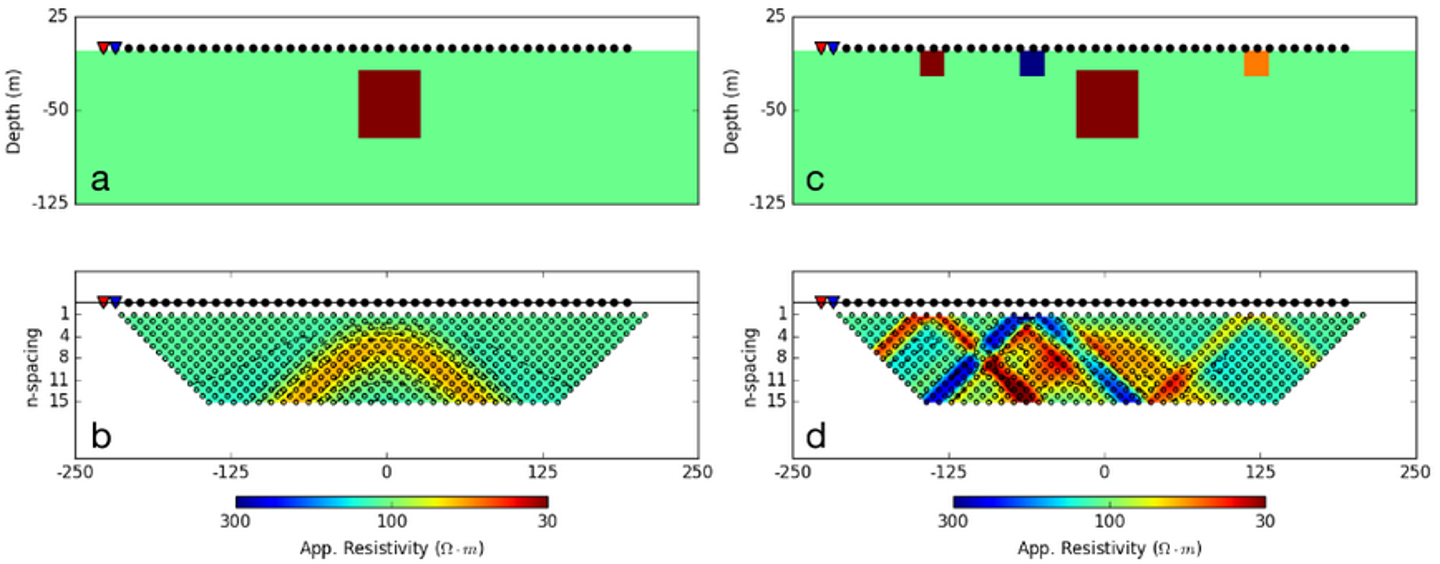

# Inversion
How do we interpret all this data?

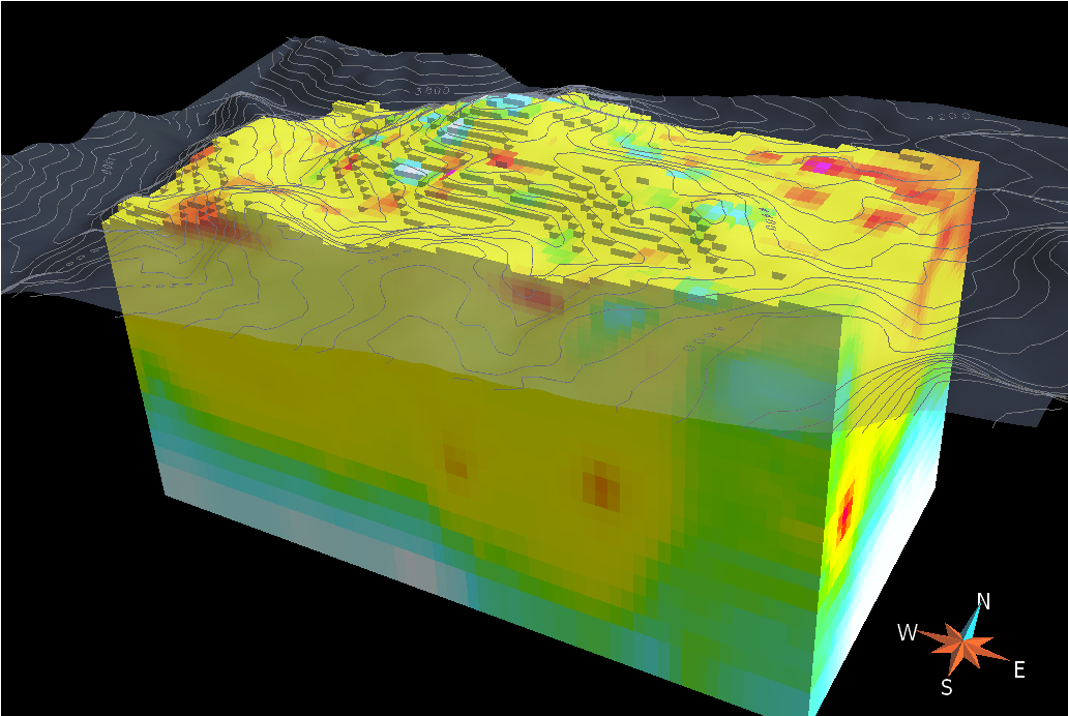

## Geophysical inversion
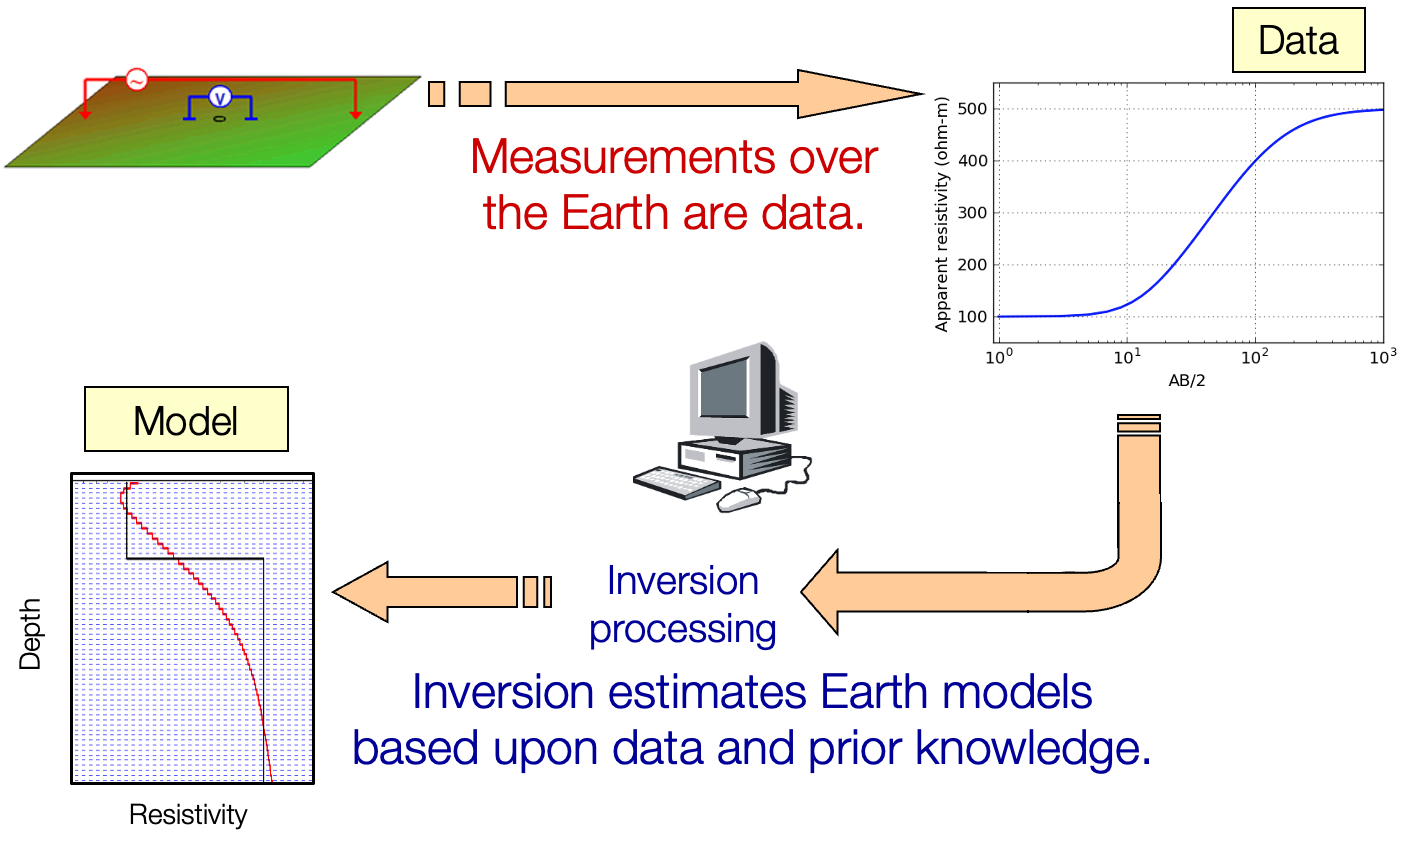

### Goal of inversion:
<div class="row">
<div class="column">

Find a resistivity (conductivity) model that:
* Explains the data
* Represents the true geology

</div>
<div class="column">

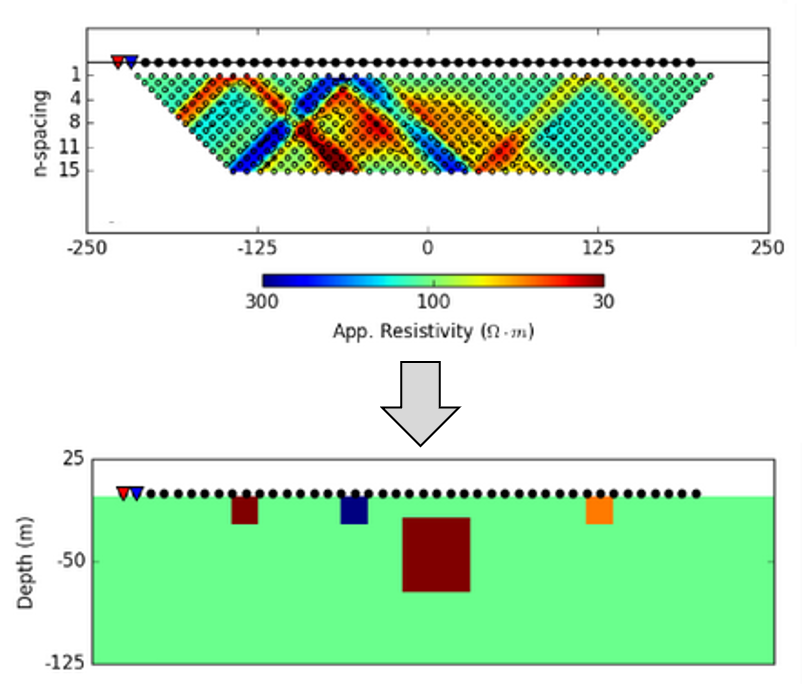
</div>
</div>

### Goal of inversion:
<div class="row">
<div class="column">

* Inversion does **not** recover the true model
* Recovers an a geologically approximate model
* Solution is **non-unique**
* Recovers structures represented in the data

</div>
<div class="column">

![model](https://simpeg.xyz/user-tutorials/build/31b25ddd1fdb19c2dec718f2a888d56e.png)

![data](https://simpeg.xyz/user-tutorials/build/f9b3cea9b4ec9b3399f74f9270d59a38.png)

![inversion](https://simpeg.xyz/user-tutorials/build/cbc9ab4cae0c0a3c2db20eb7db90167b.png)
</div>
</div>

### Pseudo-Section vs Inversion
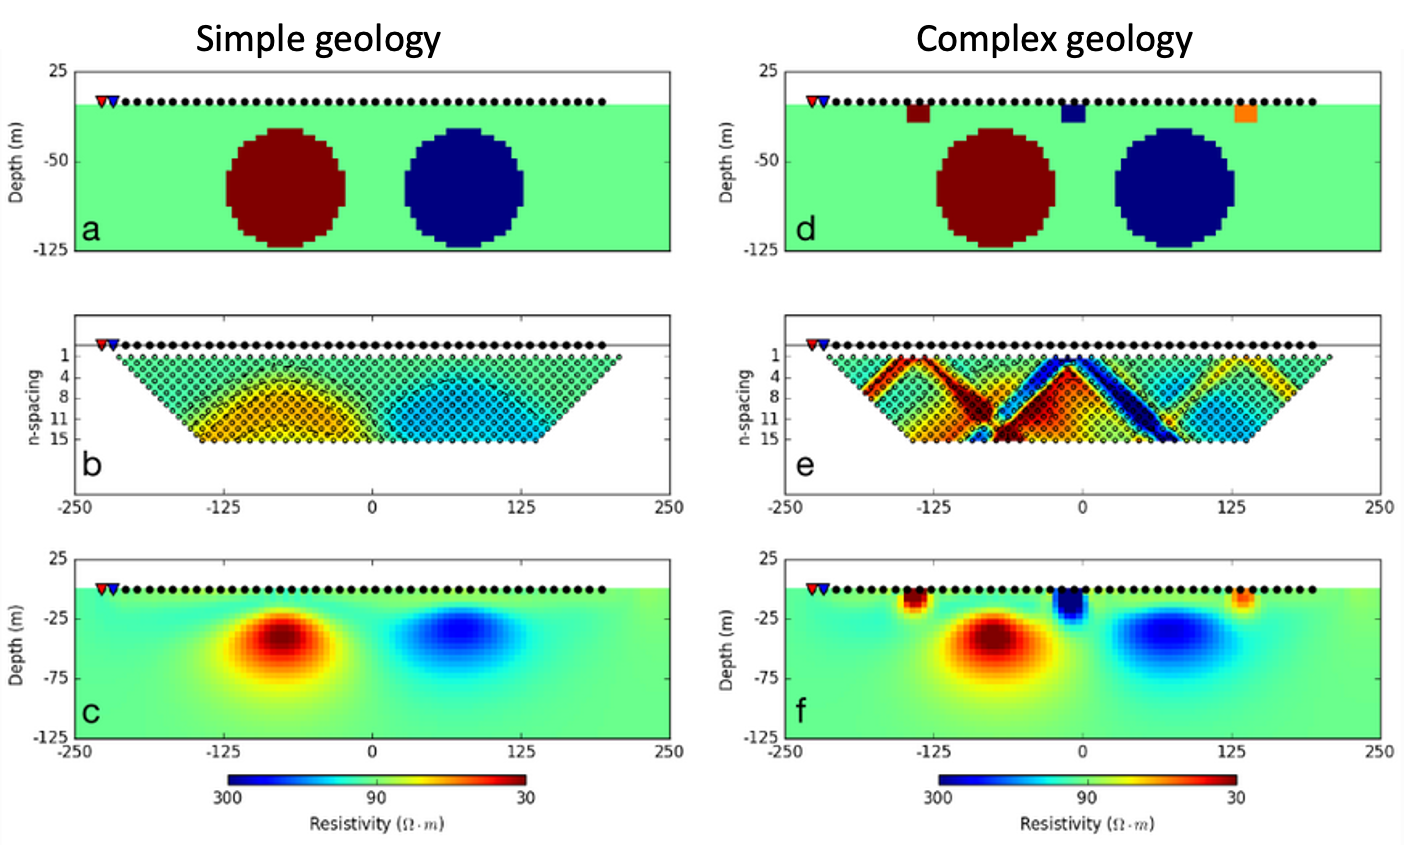

### Inversion Requirements

<div class="row">
<div class="column">
    
1) A physical model (respects the physics) $$ \nabla \cdot \sigma \nabla V = -I\delta(\vec{r} - \vec{r}_s) $$
1) Field observations (must fit data) $$ data = V_M - V_N$$
1) A starting model (initial guess)
1) Reference model (impose suspected features)
1) Constraints
   * Geologically reasonable solution

Creates a geologically representative resistivity model
</div>
<div class="column">

Q: If the recovered model
* doesn’t fit the data
* is geologically reasonable  
is it a good solution?

Q: If the recovered model
* fits the data
* isn’t geologically reasonable  
is it a good solution?
</div>
</div>

## Examples:

### Layered Halfspace
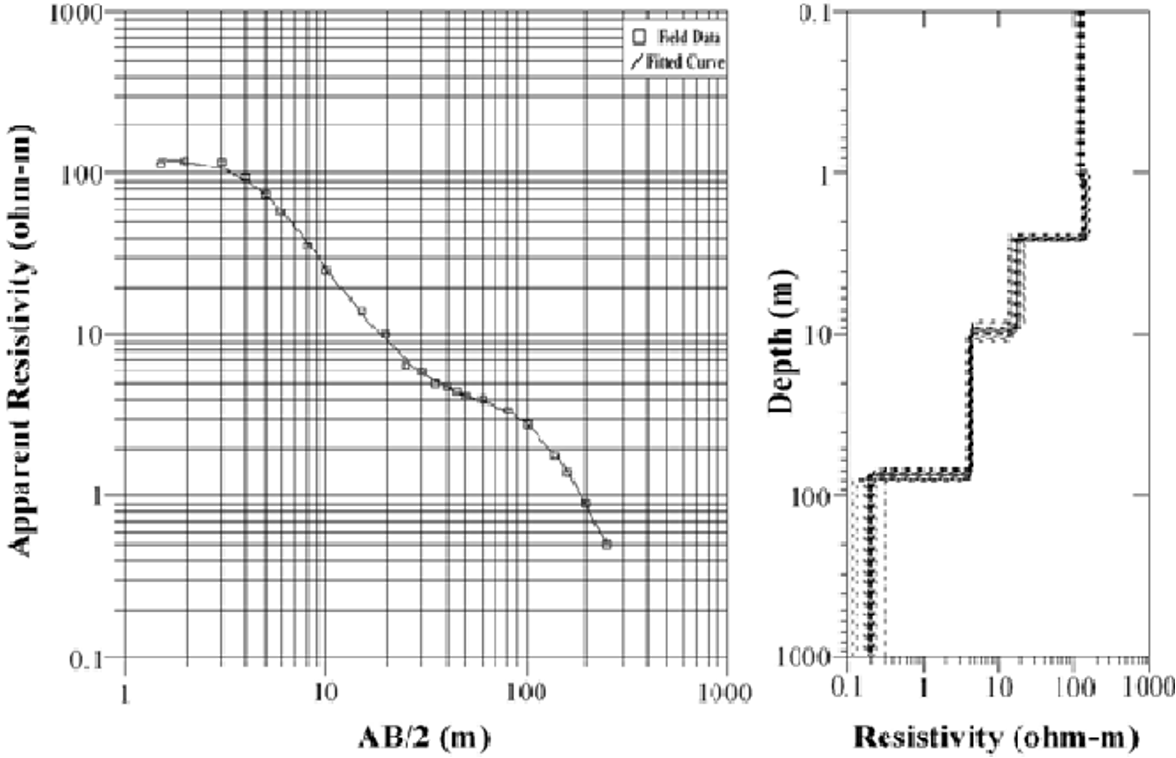

### Buried Prism:
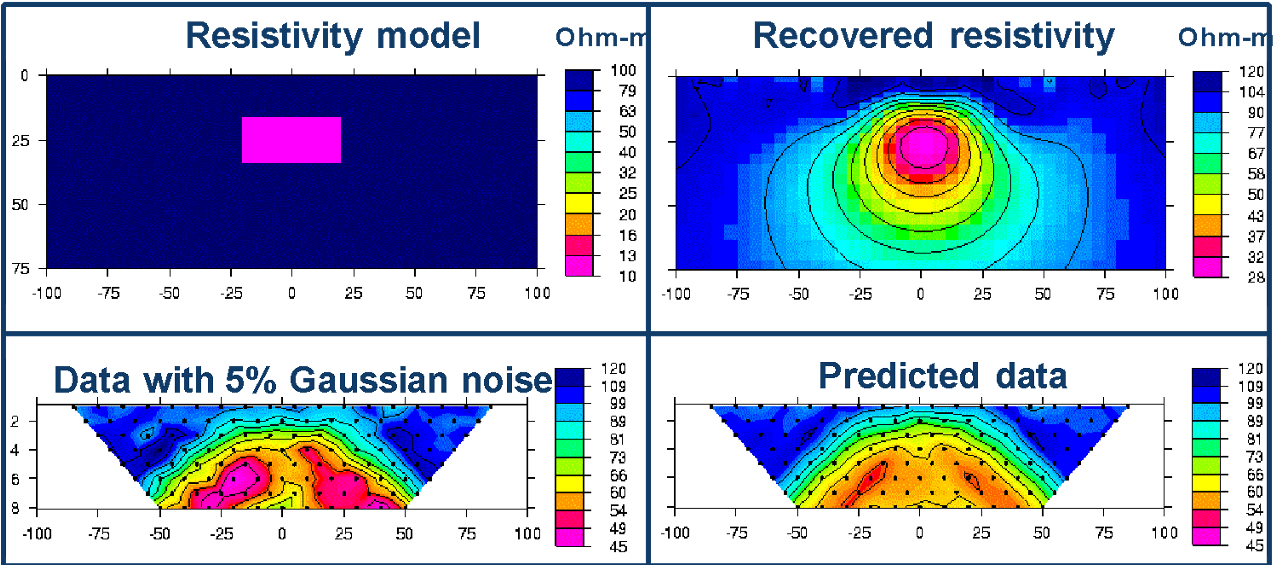
* Dipole-dipole;  n=1,8;  a=10m;  N=316;  ($\alpha_s$, $\alpha_x$, $\alpha_z$)=(.001, 1.0, 1.0)

### Prism with "geologic" noise:
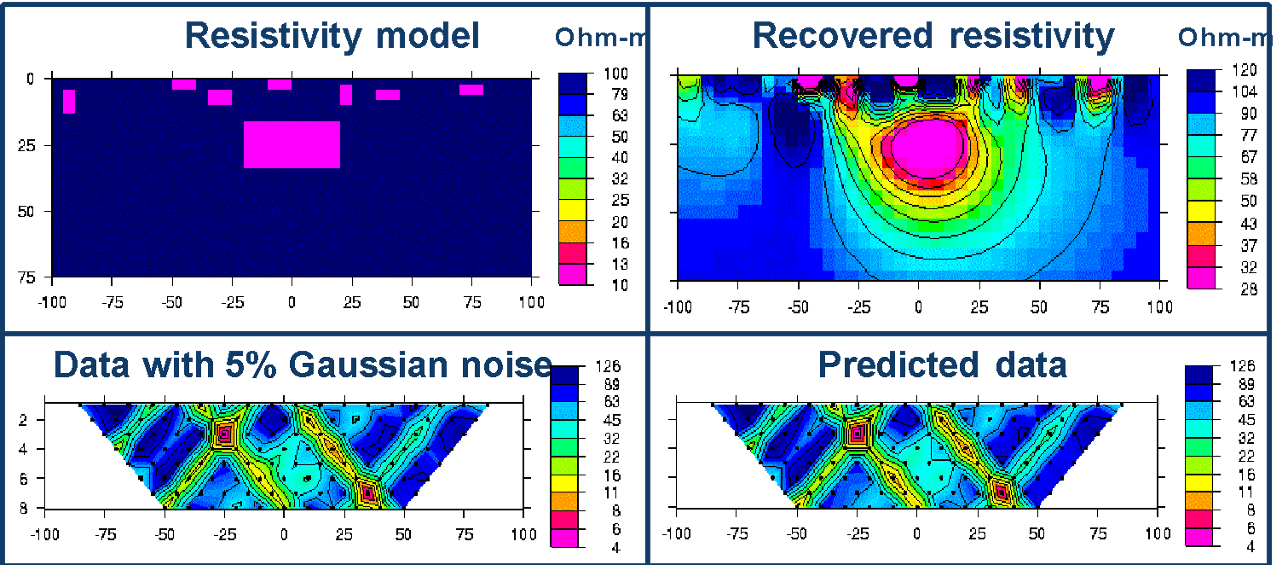
* Dipole-dipole;  n=1,8;  a=10m;  N=316;  ($\alpha_s$, $\alpha_x$, $\alpha_z$)=(.001, 1.0, 1.0)

### Variable Topography
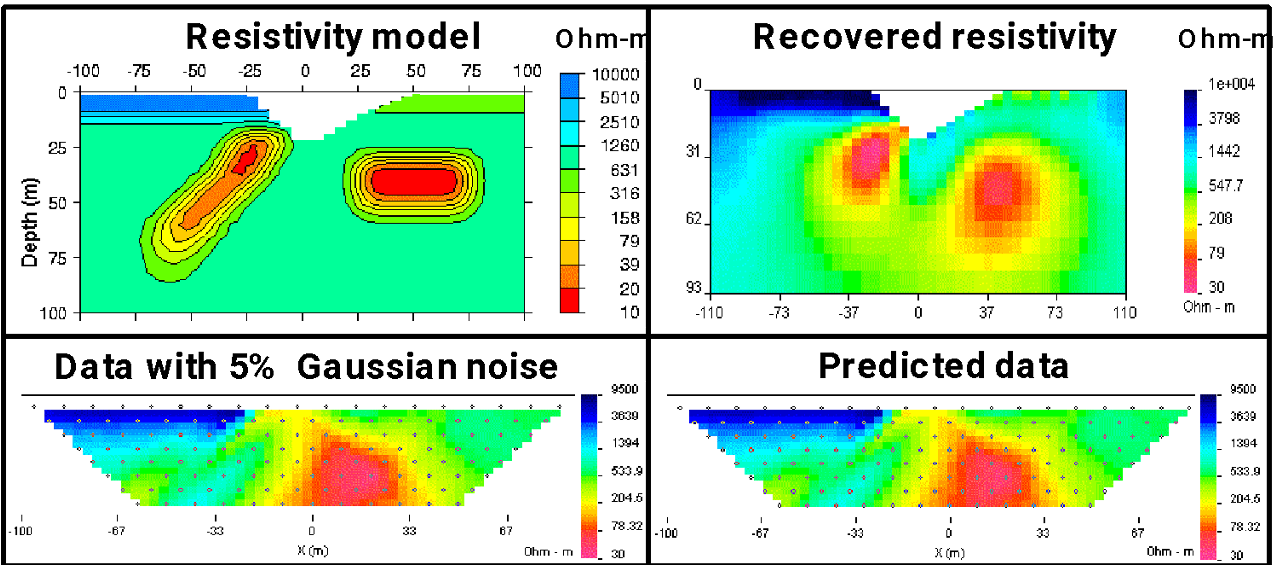
* Pole-dipole;  n=1,8;  a=10m; ($\alpha_s$, $\alpha_x$, $\alpha_z$)=(.001, 1.0, 1.0)

# Sensitivity

To recover a geological structure:
* Data must be sensitive to that structure (e.g. structure must generate signatures in data)

Things to consider:
* Are current and potential electrodes coupled with target? (e.g. see signatures in data)
* Is electrode spacing large enough to see deep enough?
* Does enough current penetrate the conductive overburden?

### Example: Two spheres


<div class="row">
<div class="column">

* Electrodes coupled with spheres
* Data sensitive to top of spheres
* Data not sensitive to bottom of spheres
    * why?
</div>
<div class="column">

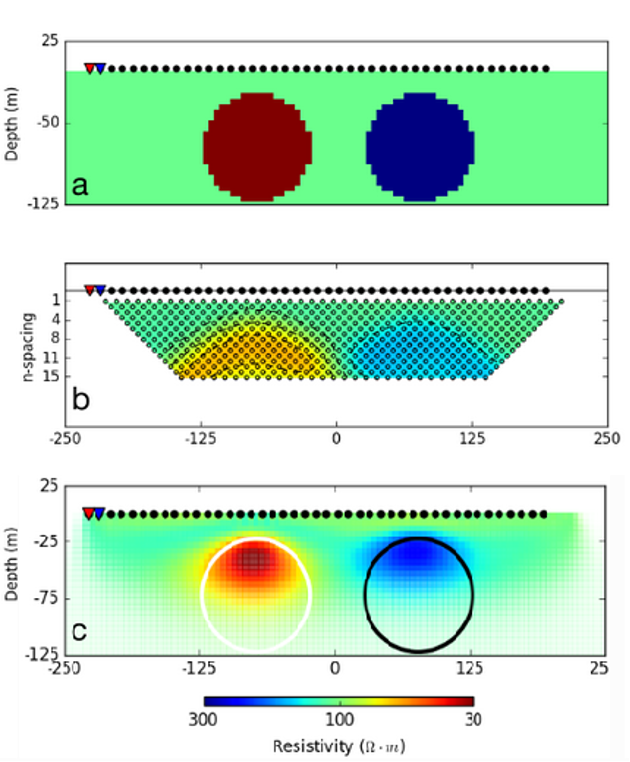
</div>
</div>

---
<div class="row">
<div class="column">
    
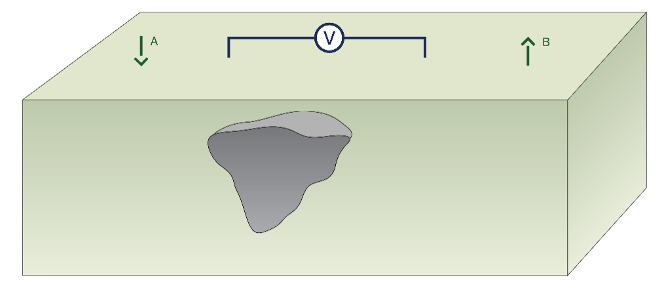
</div>
<div class="column">

Defines how a change in the model would change the data
</div>
</div>

---
<div class="row">
<div class="column">
    
Quantified by the sensitivity!
</div>
<div class="column">

$$ G = \frac{\Delta d}{\delta \sigma} = \frac{\text{change in data}}{\text{change in model}}$$
</div>
</div>

---
Collect the data that are sensitive to the target
* Need to excite the target
* Need to have sensor close to the target

$\rightarrow$ Need “good coupling”

## Exciting the target
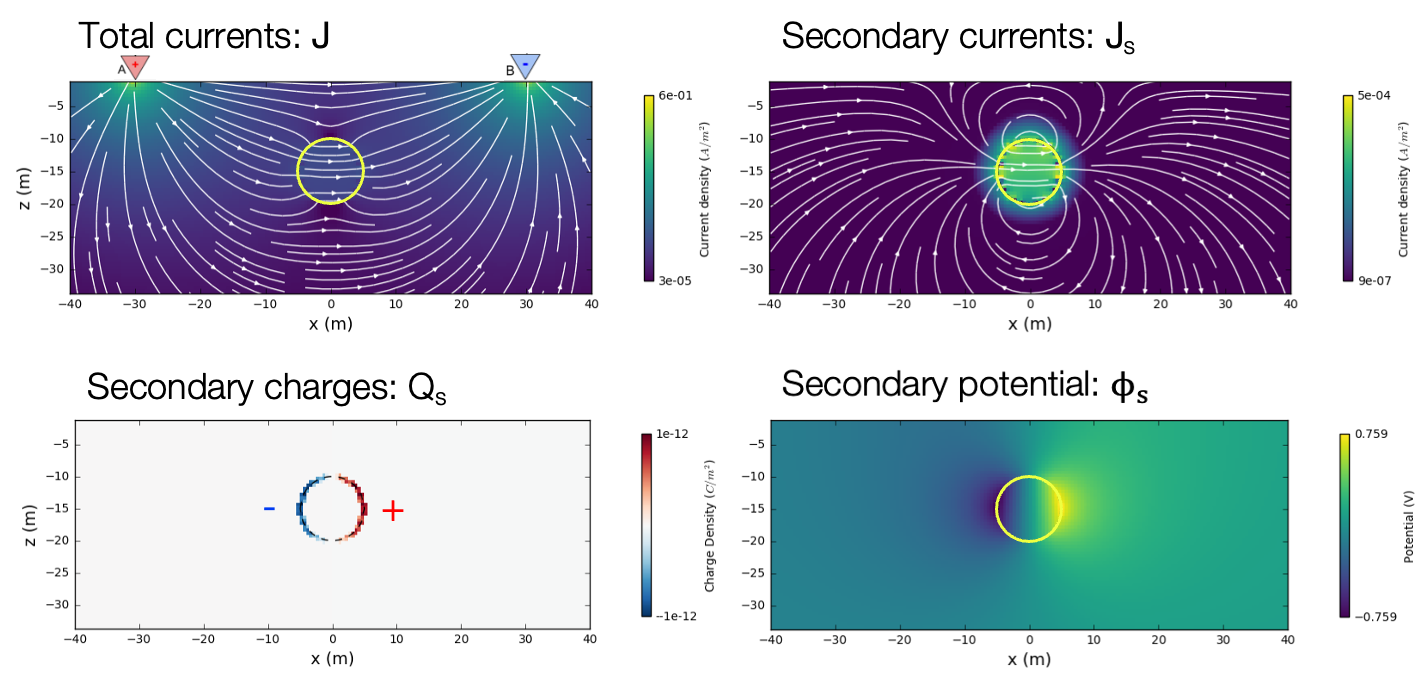

### Measurements:
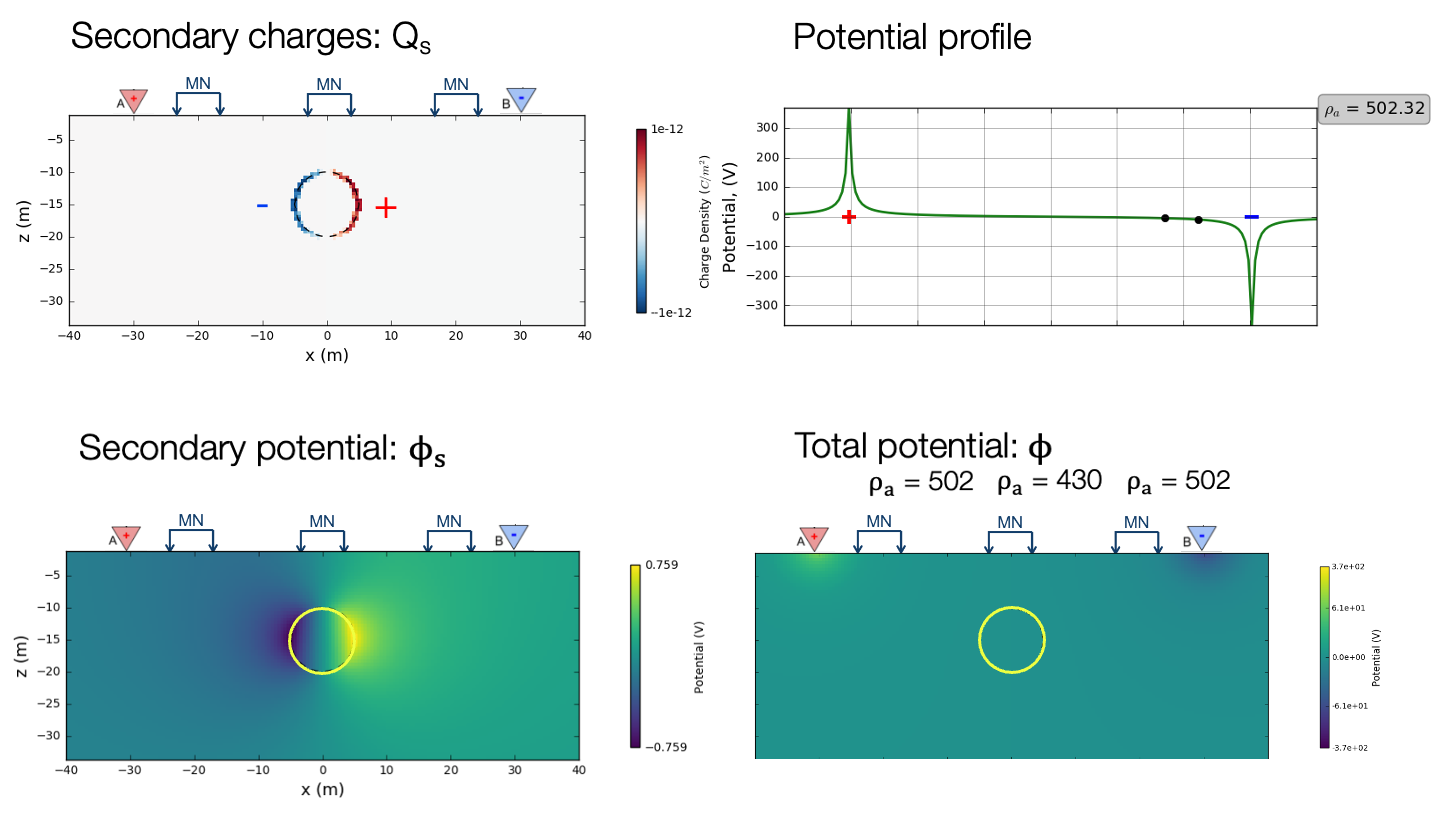

## Example
### Gradient Array:

<div class="row">
<div class="column">

Q: Do you expect to recover block 1?

Q: Do you expect to recover block 2?
</div>
<div class="column">

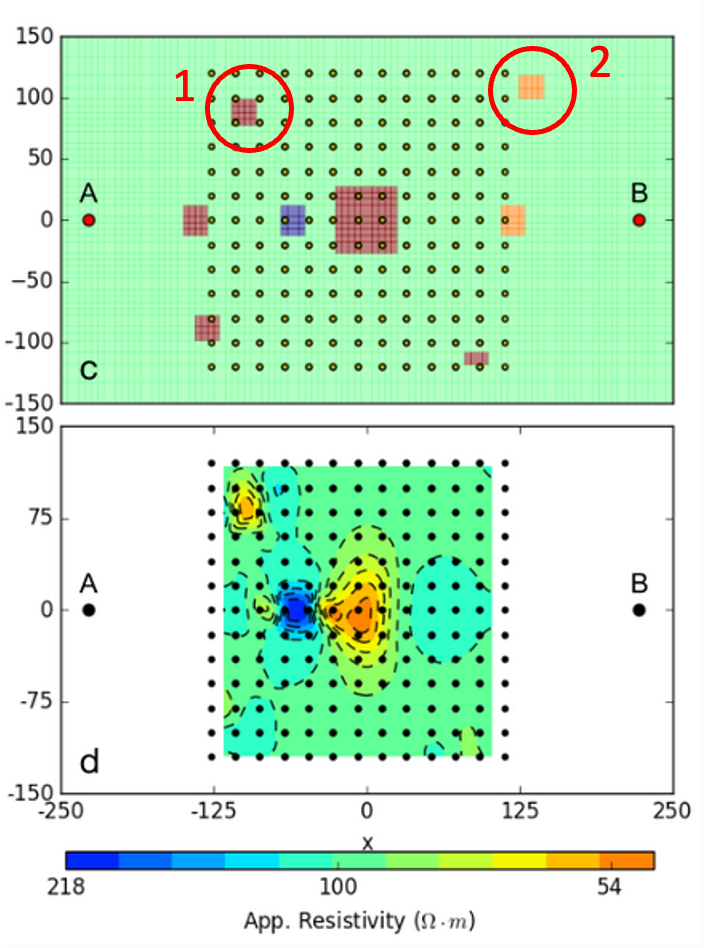
</div>
</div>

### Thin conductive Plate:
Different orientation $\rightarrow$ Different coupling $\rightarrow$ Different Data
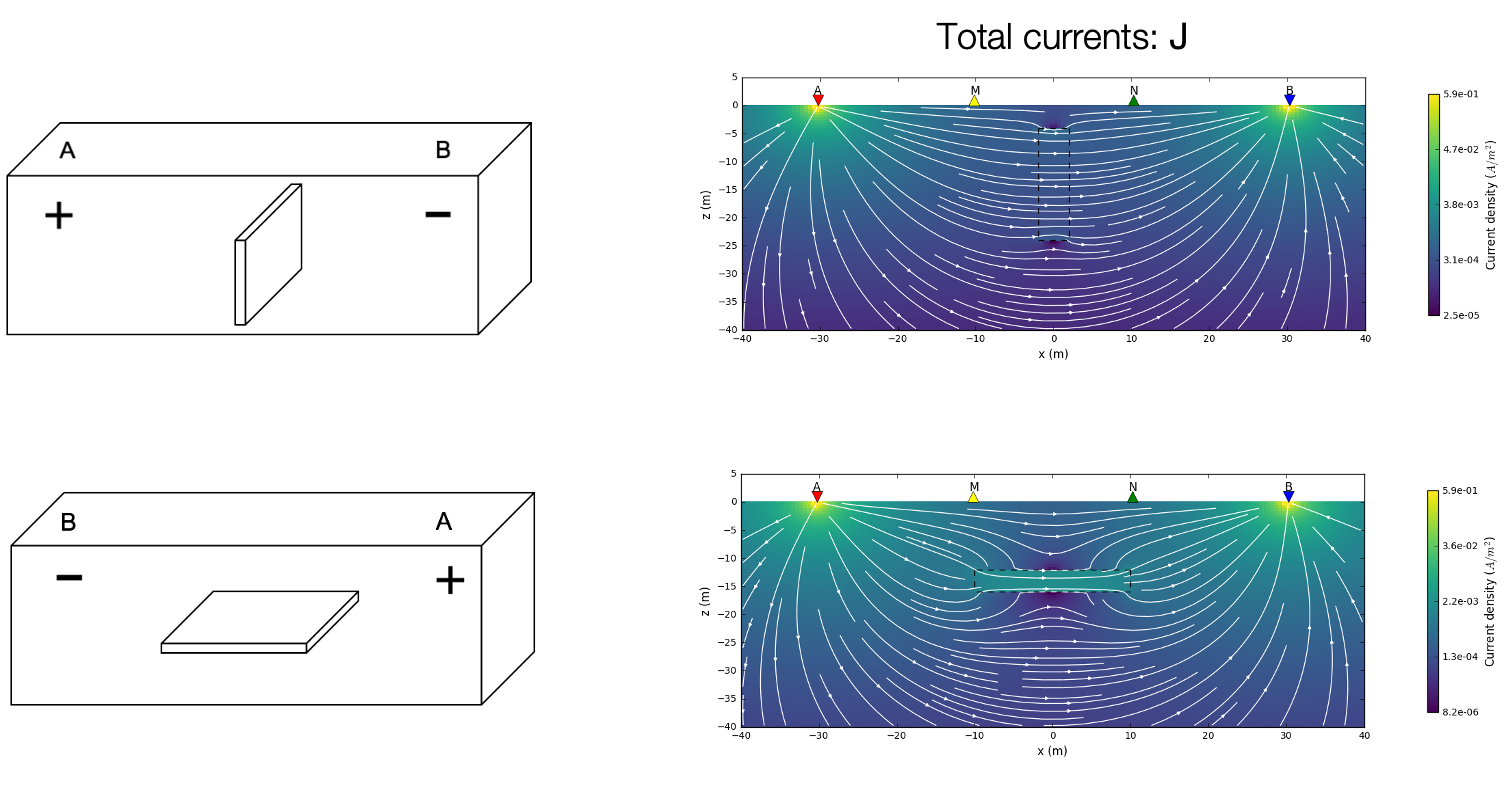

### Conductive vs Resistive plate:
<div class="row">
<div class="column">

**Conductive**

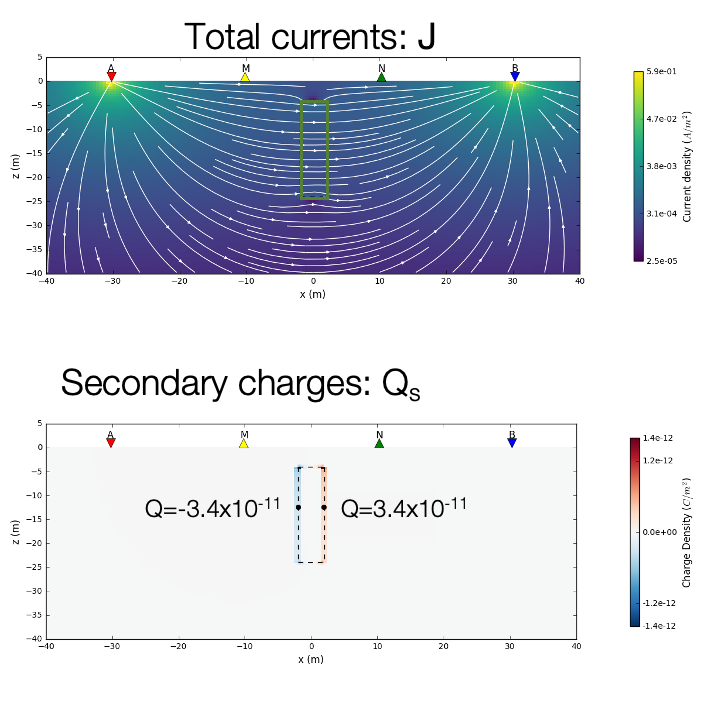
</div>
<div class="column">

**Resistive**

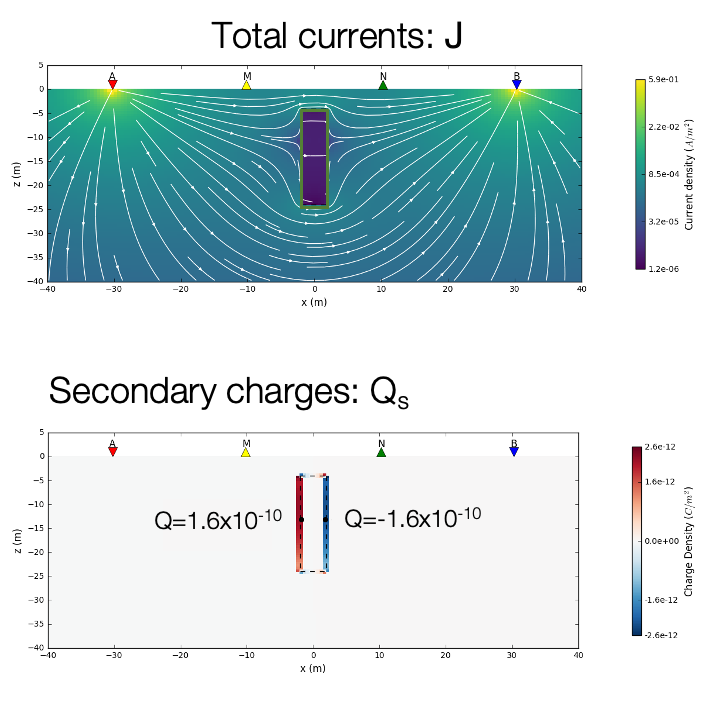
</div>
</div>

## Sensitivity factors
* “Excite” the target
    * Drive currents to target
    * Need good coupling with target
* Measuring a datum
    * Proximity to target
    * Electrode orientation and separation
* Background resistivity is important 

# Modeling for Lab 10

## Archeology Wall
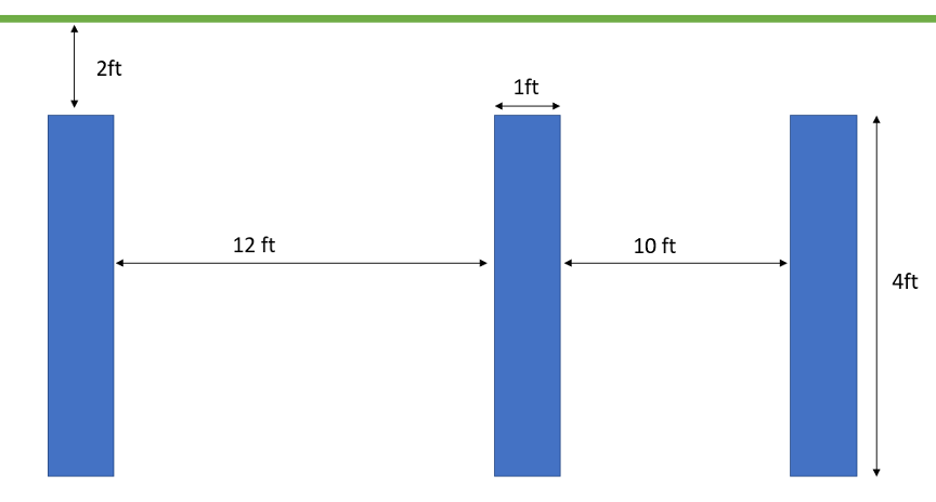

In [ ]:
import simpeg.electromagnetics.static.resistivity as res
import simpeg.electromagnetics.static.utils as static_utils
from simpeg.utils.solver_utils import get_default_solver
import discretize
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import foot

In [ ]:
# make mesh for modelling slab and walls
wall_origin = -12 * foot
wall0 = np.array([[wall_origin, -2 * foot], [wall_origin + 1 * foot, -6 * foot]])
wall1 = wall0 + [13 * foot, 0]
wall2 = wall1 + [11 * foot, 0]

wall_mins = [wall0[0], wall1[0], wall2[0]]
wall_max = [wall0[1], wall1[1], wall2[1]]

slab_tops = np.c_[[0, 30*foot], [-2*foot , -7.2 * foot]] - 30 * foot / 2
dy = 1 * np.cos(10 * np.pi / 180)
dx = 1 * np.sin(10 * np.pi / 180)
slab = np.r_[slab_tops, slab_tops - [dx, dy]]
slab_tri = np.array([[slab[0], slab[1], slab[2]],[slab[1], slab[2], slab[3]]])

In [ ]:
mesh = discretize.TreeMesh([[(0.05, 1024*2)],[(0.05, 1024*2)]], origin='CN', diagonal_balance=True)
mesh.refine_box(wall_mins, wall_max, levels=-1, finalize=False)
mesh.refine_triangle(slab_tri, levels=-1, finalize=False)
mesh.refine_points(np.c_[np.linspace(-25, 25, 256), np.zeros(256)], level=-1, padding_cells_by_level=5)

In [ ]:
mesh.plot_grid()

In [ ]:
wall0_cells = mesh.get_cells_in_aabb(wall_mins[0], wall_max[0])
wall1_cells = mesh.get_cells_in_aabb(wall_mins[1], wall_max[1])
wall2_cells = mesh.get_cells_in_aabb(wall_mins[2], wall_max[2])

wall_cells = np.unique(np.r_[wall0_cells, wall1_cells, wall2_cells])

cond_walls = np.full(mesh.n_cells, 0.2)
cond_walls[wall_cells] = 1E-3

plt.figure()
ax = plt.gca()
mesh.plot_image(cond_walls, grid=False, ax=ax)
ax.set_xlim([-8, 8])
ax.set_ylim([-4, 0])
ax.set_aspect(1)

In [ ]:
inds_slab1 = mesh.get_cells_in_triangle(slab_tri[0])
inds_slab2 = mesh.get_cells_in_triangle(slab_tri[1])
inds_slab = np.unique(np.r_[inds_slab1, inds_slab2])

cond_slab = np.full(mesh.n_cells, 0.2)
cond_slab[inds_slab] = 1E-3


plt.figure()
ax = plt.gca()
mesh.plot_image(cond_slab, ax=ax)
ax.set_xlim([-16, 16])
ax.set_ylim([-8, 0])
ax.set_aspect(1)

In [ ]:
def make_survey(spacing, length, survey_type, n=10):
    if survey_type != "wenner":
        sources = static_utils.generate_dcip_sources_line(
            survey_type, "volt", "2D", [-length/2, length/2], np.asarray([[-100000, 0], [100000, 0]]), n, spacing
        )
        return res.Survey(sources)
    else:
        n_electrodes = int(length // spacing)
        return res.Survey(res.utils.WennerSrcList(n_electrodes, a_spacing=float(spacing), in2D=True))

In [ ]:
dx = 0.5
length = dx * 32
survey_wall = make_survey(dx, length, "dipole-dipole", n=20)


pseudo_locations_xz = static_utils.pseudo_locations(survey_wall)
fig = plt.figure(figsize=(8, 2.75))
ax = fig.add_axes([0.1, 0.1, 0.85, 0.8])
ax.scatter(pseudo_locations_xz[:, 0], pseudo_locations_xz[:, -1], 8, "r")
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.set_title("Pseudo-locations")
plt.show()

In [ ]:
sim_walls = res.Simulation2DNodal(mesh, survey=survey_wall, sigma=cond_walls, solver=get_default_solver(), miniaturize=True)

dpred = sim_walls.dpred()

apparent_resistivities = static_utils.apparent_resistivity_from_voltage(survey_wall, dpred)

# Plot apparent conductivity pseudo-section
fig = plt.figure()
ax1 = plt.gca()
static_utils.plot_pseudosection(
    survey_wall,
    dobs=apparent_resistivities,
    plot_type="contourf",
    ax=ax1,
    scale="log",
    cbar_label=r"$\Omega ",
    mask_topography=True,
    contourf_opts={"levels": 20, "cmap": "RdYlBu_r"},
)
ax1.set_title("Apparent Resistivity")
plt.show()

## Dipping slab
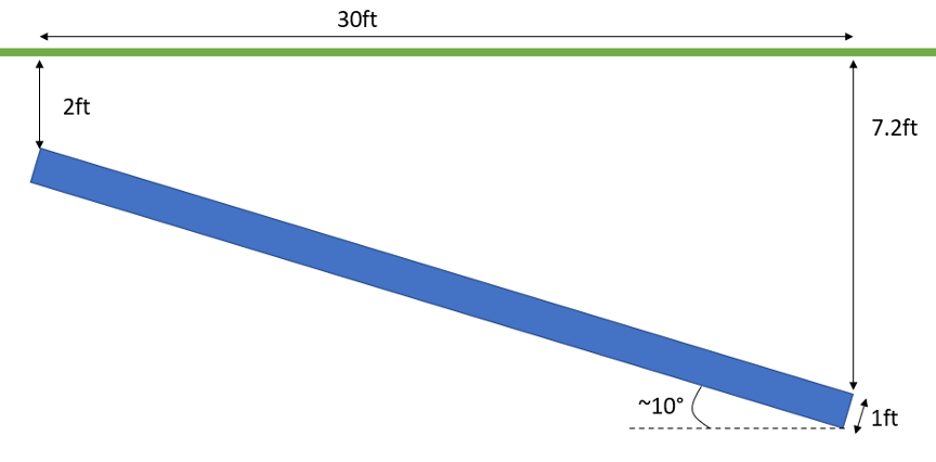

In [ ]:
dx = 2
length = dx * 32
survey_slab = make_survey(dx, length, "wenner", n=20)

pseudo_locations_xz = static_utils.pseudo_locations(survey_slab)
fig = plt.figure(figsize=(8, 2.75))
ax = fig.add_axes([0.1, 0.1, 0.85, 0.8])
ax.scatter(pseudo_locations_xz[:, 0], pseudo_locations_xz[:, -1], 8, "r")
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")
ax.set_title("Pseudo-locations")
plt.show()

In [ ]:
sim_slab = res.Simulation2DNodal(mesh, survey=survey_slab, sigma=cond_slab, solver=get_default_solver(), miniaturize=True)

dpred = sim_slab.dpred()

apparent_resistivities = static_utils.apparent_resistivity_from_voltage(survey_slab, dpred)

# Plot apparent conductivity pseudo-section
fig = plt.figure()
ax1 = plt.gca()
static_utils.plot_pseudosection(
    survey_slab,
    dobs=apparent_resistivities,
    plot_type="contourf",
    ax=ax1,
    scale="log",
    cbar_label=r"$\Omega ",
    mask_topography=True,
    contourf_opts={"levels": 20, "cmap": "RdYlBu_r"},
)
ax1.set_title("Apparent Resistivity")
plt.show()